In [1]:
'''
【课程3.5】 蒙特卡罗模拟
'''

'\n【课程3.5】 蒙特卡罗模拟\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

[ 1.05515562  0.7580726   0.68815993 ...,  0.94952226  0.93388857
  0.8583537 ]
π的值3.13548


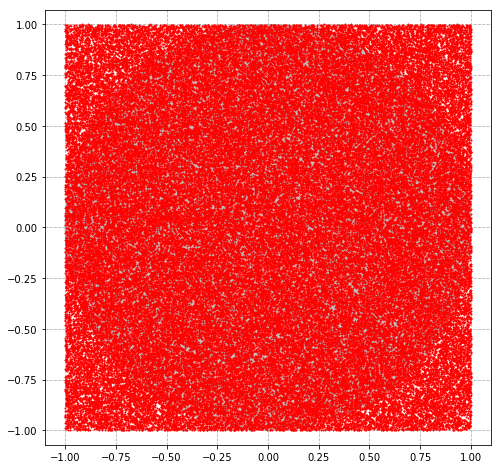

In [11]:
# π的计算
from matplotlib.patches import Circle
 
n = 100000                              # 投点次数

r = 1.0                                 # 半径
a,b = (0.,0.)                           # 圆心

x_min,x_max = a-r,a+r                   # 正方形区域边界
y_min,y_max = b-r,b+r

x = np.random.uniform(x_min,x_max,n)    # 均匀分布
y = np.random.uniform(y_min,y_max,n)    # 在正方形区域内随机投点
                                        # numpy.random.uniform(low,high,size) → 从一个均匀分布[low,high)中随机采样，均匀分布
d = np.sqrt((x-a)**2 + (y-b)**2)        # 计算点到圆心的距离
print (d)
res = sum(np.where(d<r,1,0))            # 统计落在圆内的点的数目
 
pi = 4*res/n
print(f'π的值{pi}')

fig = plt.figure(figsize=(8,8))
axes = fig.add_subplot(1,1,1)
plt.plot(x,y,'ro',markersize=1)
plt.axis('equal')

circle = Circle(xy=(a,b),radius=r,alpha=0.5,color='gray')
axes.add_patch(circle)
plt.grid(True, linestyle = "--",linewidth = 0.8)
plt.show()

定积分的值:0.3354


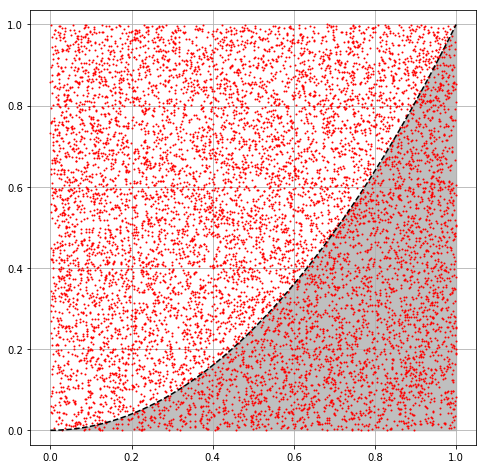

In [6]:
# 计算积分 y = x**2

n = 10000                                 # 投点次数

x_min,x_max= 0.0,1.0                      # 矩形区域边界
y_min,y_max= 0.0,1.0

x = np.random.uniform(x_min,x_max,n)      # 均匀分布
y = np.random.uniform(y_min,y_max,n)      # 在矩形区域内随机投点

def f(x):                                 # 创建函数 y = x**2
    return x**2

res = sum(np.where(y<f(x),1,0))           # 统计 落在函数 y=x^2图像下方的点的数目

integral = res / n                        # 计算 定积分的近似值
print(f'定积分的值:{integral}')

fig = plt.figure(figsize=(8,8))          
axes = fig.add_subplot(1,1,1)         
axes.plot(x,y,'ro',markersize=1)          # 绘制散点图
plt.axis('equal')

xi = np.linspace(0,1,100)
yi = xi ** 2
plt.plot(xi,yi,'--k')                     # 绘制 y = x**2 面积图
plt.fill_between(xi,yi,0,color='gray',alpha=0.5,label='area')
plt.grid()

<class 'list'>
range(1, 20) 19
第1个人:到达时间 开始时间 “工作”时间 完成时间 等待时间
 0.694421175003 2.27296696999 1.26534036373 3.53830733372 1.57854579499 

第2个人:到达时间 开始时间 “工作”时间 完成时间 等待时间
 1.41425075464 3.53830733372 2.49393359241 6.03224092613 2.12405657908 

第3个人:到达时间 开始时间 “工作”时间 完成时间 等待时间
 2.06405015425 6.03224092613 2.0053839678 8.03762489393 3.96819077189 

第4个人:到达时间 开始时间 “工作”时间 完成时间 等待时间
 2.52442082912 8.03762489393 2.72025851018 10.7578834041 5.51320406481 

第5个人:到达时间 开始时间 “工作”时间 完成时间 等待时间
 3.63507202032 10.7578834041 2.31771177944 13.0755951836 7.12281138379 

第6个人:到达时间 开始时间 “工作”时间 完成时间 等待时间
 3.74202940414 13.0755951836 2.94260727876 16.0182024623 9.33356577941 

第7个人:到达时间 开始时间 “工作”时间 完成时间 等待时间
 3.94248074268 16.0182024623 1.11366178897 17.1318642513 12.0757217196 

第8个人:到达时间 开始时间 “工作”时间 完成时间 等待时间
 4.47028068582 17.1318642513 2.18261579348 19.3144800448 12.6615835655 

第9个人:到达时间 开始时间 “工作”时间 完成时间 等待时间
 5.30226460997 19.3144800448 1.61769856423 20.932178609 14.0122154348 

第10个人:到达时间 开始时间 “工作”时间 完成

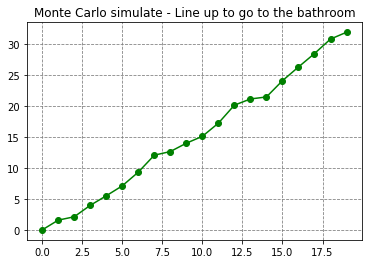

In [16]:
# 厕所排队问题
# 1、两场电影结束时间相隔较长，互不影响；
# 2、每场电影结束之后会有20个人想上厕所；
# 3、这20个人会在0到10分钟之内全部到达厕所）；
# 4、每个人上厕所时间在1-3分钟之间
# 首先模拟最简单的情况，也就是厕所只有一个位置，不考虑两人共用的情况则每人必须等上一人出恭完毕方可进行。
# 分析：对于每个人都有如下几个参数：
# 到达时间 / 等待时间 / 开始上厕所时间 / 结束时间

arrivingtime = np.random.uniform(0,10,size=20)     # 到达时间
arrivingtime.sort()
workingtime = np.random.uniform(1,3,size=20)       # 等待时间

startingtime = [0 for i in range(20)]              # 开始时间
print (type(startingtime))
finishtime = [0 for i in range(20)]                # 结束时间
waitingtime = [0 for i in range(20)]               # 等待时间
emptytime = [0 for i in range(20)]                 # 空闲时间

startingtime[0] = arrivingtime[0]                  # 第一个人之前没有人，所以开始时间 = 到达时间
finishtime[0] = startingtime[0] + workingtime[0]   # 第一个人完成时间 = 开始时间 + “工作”时间
waitingtime[0] = startingtime[0] - arrivingtime[0] # 第一个人不用等待

print (range(1,len(arrivingtime)),len(range(1,len(arrivingtime))))
for i in range(1,len(arrivingtime)):
    if finishtime[i-1] > arrivingtime[i]:          # 如果第一个人的上厕所时间,大于第二个人的到达时间
        startingtime[i] = finishtime[i-1]          # 则无需等待
    else:                                          # 开始时间 = 到达时间，且存在空闲时间 = 到达时间 - 上一个人完成时间
        startingtime[i] = arrivingtime[i]
        emptytime[i] = arrivingtime[i] - finishtime[i-1]
    finishtime[i] = startingtime[i] + workingtime[i]
    waitingtime[i] = startingtime[i] - arrivingtime[i]
    print(f'第{i}个人:到达时间 开始时间 “工作”时间 完成时间 等待时间\n',
          arrivingtime[i],startingtime[i],workingtime[i],
          finishtime[i],waitingtime[i],'\n')

print(f'arrange waiting time is {np.mean(waitingtime)}')

fig = plt.figure(figsize=(6,4))                   # 图表绘制
plt.plot(waitingtime,'-go')
plt.grid(True,linestyle='--',color='gray',linewidth=0.8)
plt.title('Monte Carlo simulate - Line up to go to the bathroom')
plt.show()